<a href="https://colab.research.google.com/github/jonathanslau/math_and_cats/blob/gui-feature/Math_and_Cats_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math and Cats 2


In [15]:
# allow graphical interactions
# %matplotlib notebook
# doesn't work in colab?

# load libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import ipywidgets as widgets
from IPython.display import clear_output

The surface area of Rocco is approximately 0.342 m^2.
Our small hypothetical cat has a surface area of approximately 0.169 m^2.


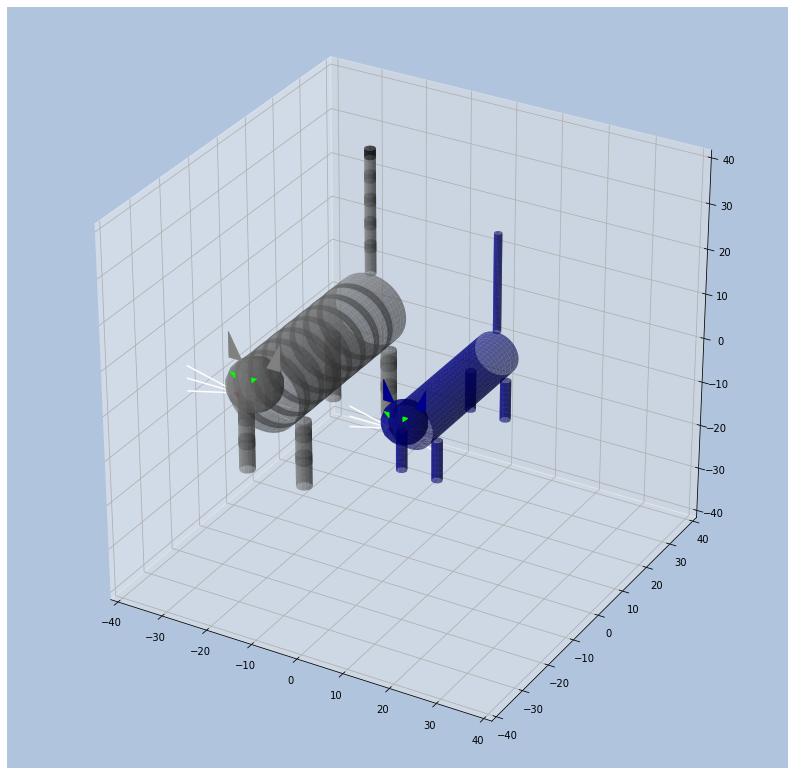

In [20]:
# set up plot object
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
# units of measure used here will be 1:1 with measurements in cm
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-40, 40)

ax.set_facecolor('lightsteelblue')

# function for generating cylinder coordinates
def generate_cylinder(center_x, center_y, offset_z, rotate_x, radius, height_z, colour, is_tabby, alpha):
    # generate z array for height/length of cylinder
    z = np.linspace(-int(height_z)/2, int(height_z)/2, int(height_z))
    # generate array for circumference of cylinder
    theta = np.linspace(0, 2*np.pi, int(height_z))
    theta_grid, Zc=np.meshgrid(theta, z)
    # generate coordinates for surface of cylinder
    Xc = radius*np.cos(theta_grid) + center_x
    Yc = radius*np.sin(theta_grid) + center_y
    # if rotation is required, then calculate rotation
    if rotate_x != 0:
      Xc, Yc, Zc = rotate_cylinder_x(Xc, Yc, Zc, rotate_x)
    # offset z
    Zc = Zc + offset_z
    # render cylinder
    ax.plot_surface(Xc, Yc, Zc, alpha=alpha, color=colour)
    # if a tabby coat is desired, build tabby pattern as black rings
    if is_tabby == True:
      n = 0
      for i in range(len(Zc)):
        if n == 5:
          ax.plot_surface(Xc[i:i+3:], Yc[i:i+3:], Zc[i:i+3:], alpha=0.5, color='black')
          n = 0
        n+=1
    return

# function for rotating cylinder on x axis
def rotate_cylinder_x(Xc, Yc, Zc, degrees):
    # convert degrees to radians
    theta = np.radians(degrees)
    # calculate new coordinates
    Yc_rotated = Yc * np.cos(theta) - Zc * np.sin(theta)
    Zc_rotated = Zc * np.cos(theta) + Yc * np.sin(theta)
    return Xc, Yc_rotated, Zc_rotated

# function for generating a sphere
def generate_sphere(center_x, center_y, offset_z, radius, alpha, colour):
    # generate coordinates for surface of sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x_grid = radius * np.cos(u) * np.sin(v) + center_x
    y_grid = radius * np.sin(u) * np.sin(v) + center_y   
    z_grid = radius * np.cos(v) + offset_z
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=alpha, color=colour)
    return

# set up a cat object
# set kitty count as global variable
kitty_count = 0
# l = length, c = circumference, r = radius
class cat:
  def __init__(self, is_tabby, coat_colour, eye_colour, head_c, torso_l, torso_c, limb_l, limb_c, tail_l, tail_c):
    self.is_tabby = is_tabby
    self.coat_colour = coat_colour
    self.eye_colour = eye_colour
    self.head_c = head_c
    self.torso_l = torso_l
    self.torso_c = torso_c
    self.limb_l = limb_l
    self.limb_c = limb_c
    self.tail_l = tail_l
    self.tail_c = tail_c
    # convert circumference to radius
    pi2 = (2*np.pi)
    self.head_r = self.head_c/pi2
    self.torso_r = self.torso_c/pi2
    self.limb_r = self.limb_c/pi2
    self.tail_r = self.tail_c/pi2
  
  def estimate_sa(self):
    # calculate 2π once 
    pi2 = (2*np.pi)
    # cat torso, area of a cylinder=2πrh+2πr2
    # we are ignoring one of the circles as that is where the cat head goes
    sa = pi2*self.torso_r*self.torso_l + 1*np.pi*self.torso_r**2
    # limbs
    # we are again ignoring one of the circles, where the limb joins the torso
    sa = sa + 4 * (pi2 * self.limb_r * self.limb_l + 1 * np.pi * self.limb_r**2)
    # tail
    sa = sa + (pi2 * self.tail_r * self.tail_l + 1 * np.pi * self.tail_r**2)
    # head, area of a sphere = 4πr2
    sa = sa + (4 * np.pi * self.head_r**2)
    # we will not consider the surface area of the ears as no fur grows there
    return sa

  def draw_kitty(self):
    # keep count of the number of kitties to determine x position
    global ax, kitty_count
    center_x = -20 + kitty_count*30
    # calculate 2π once 
    pi2 = (2*np.pi)
    # start with cat torso
    generate_cylinder(center_x, 0, 0, 90, self.torso_r, self.torso_l, self.coat_colour, self.is_tabby, 0.6)
    
    # cat tail
    # calculate offsets and positions
    offset_z = self.tail_l/2 + self.torso_r
    center_y = self.torso_l/2
    generate_cylinder(center_x, center_y, offset_z, 0, self.tail_r, self.tail_l, self.coat_colour, self.is_tabby, 0.6)

    # cat limbs
    # position of joints will be relative to size of torso
    # calculate z offset
    offset_z = - self.limb_l/2 - self.torso_r * np.cos(np.radians(45))
    # set x/y positions of joints
    cat_limb_pos = {
      "front_left":[ 0.8*self.torso_r, -0.8*self.torso_l/2],
      "front_right":[ -0.8*self.torso_r, -0.8*self.torso_l/2],
      "hind_left":[ 0.8*self.torso_r, 0.8*self.torso_l/2],
      "hind_right":[ -0.8*self.torso_r, 0.8*self.torso_l/2],
    }
    for limb in cat_limb_pos:
      # transfer the list in each dictionary entry to a list variable
      temp = cat_limb_pos[limb]
      generate_cylinder(temp[0] + center_x, temp[1], offset_z, 0, self.limb_r, self.limb_l, self.coat_colour, self.is_tabby, 0.6)

    # cat head
    # calculate z offset
    offset_z = self.torso_r/2
    center_y = -self.torso_l/2 - self.head_r/2
    generate_sphere(center_x, center_y, offset_z, self.head_r, 0.6, self.coat_colour)
    
    # piece de resistance, but code still needs cleanup
    # ears
    ear_y = -self.torso_l/2 - self.head_r/2 # position ears on the same y plane
    ear_z = self.torso_r/2 + 0.8*self.head_r  # lowest z coordinate relative to head
    ear_x = center_x
    ears =  [
      ((center_x + self.head_r,ear_y,ear_z),(center_x + self.head_r/2,ear_y,ear_z),(center_x + self.head_r,ear_y,ear_z+self.head_r)),
      ((center_x - self.head_r,ear_y,ear_z),(center_x - self.head_r/2,ear_y,ear_z),(center_x - self.head_r,ear_y,ear_z+self.head_r)),
      ]
    ax.add_collection(Poly3DCollection(ears, alpha=1.0, color=self.coat_colour))
    
    # nose
    nose_y = -self.torso_l/2 - self.head_r*3/2 - 0.2 # position relative to head but -1 y to make it visible
    nose_z = 1 + self.torso_r/2
    nose_x = self.head_r/6
    nose = [((center_x - nose_x,nose_y,nose_z),(center_x,nose_y,nose_z),(center_x,nose_y,nose_z-1))]
    ax.add_collection(Poly3DCollection(nose, alpha=1.0, color='darkred'))
    
    # eyes
    eye_y = -self.torso_l/2 - self.head_r/2 - self.head_r * np.sin(np.radians(45)) # attempt to position eyes at 45 degree angle
    eye_z = self.torso_r/2 + self.head_r * np.cos(np.radians(45))  # lowest z coordinate relative to head
    offset_eye_x = self.head_r/3
    eyes =  [
      ((offset_eye_x + center_x,eye_y,eye_z),(offset_eye_x + 1 + center_x,eye_y,eye_z),(offset_eye_x + center_x,eye_y,eye_z-1)),
      ((-offset_eye_x + center_x,eye_y,eye_z),(-offset_eye_x - 1 + center_x,eye_y,eye_z),(-offset_eye_x + center_x,eye_y,eye_z-1)),
      ]
    ax.add_collection(Poly3DCollection(eyes, alpha=1.0, color=self.eye_colour))
    
    # whiskers
    # reuse coordinates from features above
    ax.plot([center_x,center_x + self.head_r*2],[nose_y,nose_y],[nose_z,nose_z], alpha=1.0, color='w')
    ax.plot([center_x,center_x - self.head_r*2],[nose_y,nose_y],[nose_z,nose_z], alpha=1.0, color='w')
    ax.plot([center_x,center_x + self.head_r*2],[nose_y,nose_y],[nose_z,nose_z - self.head_r/2], alpha=1.0, color='w')
    ax.plot([center_x,center_x - self.head_r*2],[nose_y,nose_y],[nose_z,nose_z - self.head_r/2], alpha=1.0, color='w')
    ax.plot([center_x,center_x + self.head_r*2],[nose_y,nose_y],[nose_z,nose_z + self.head_r/2], alpha=1.0, color='w')
    ax.plot([center_x,center_x - self.head_r*2],[nose_y,nose_y],[nose_z,nose_z + self.head_r/2], alpha=1.0, color='w')
    
    # iterate kitty count
    kitty_count = kitty_count + 1
    return

# is_tabby, coat_colour, eye_colour, head circumference, torso length, torso circumference
# limb length, limb circumference, tail length, tail circumference
# pass Rocco measurements and render onto graph
rocco = cat(True, 'grey', 'lime', 35, 40, 50, 15, 10, 28, 7)
rocco.draw_kitty()

# cat 2
# average_cat = cat(True, 'orange', 'green', 32, 38, 46, 12, 9, 26, 6).draw_kitty()
# cat 3
small_cat = cat(False, 'darkblue', 'lime', 28, 33, 30, 9, 7, 22, 5)
small_cat.draw_kitty()

# given his measurements, how much surface area does he have?
print('The surface area of Rocco is approximately ' + str(round((rocco.estimate_sa()/10000),3)) + ' m^2.')
print('Our small hypothetical cat has a surface area of approximately ' + str(round(small_cat.estimate_sa()/10000, 3)) + ' m^2.')

plt.show()



In [37]:
# is_tabby, coat_colour, eye_colour, head circumference, torso length, torso circumference
# limb length, limb circumference, tail length, tail circumference

# defaults
c2_hc_d, c2_torsl_d, c2_torsc_d, c2_ll_d, c2_lc_d, c2_taill_d, c2_tailc_d = 32, 38, 46, 12, 9, 26, 6

tabby_d = None

# create gui
def kitty_interface():
  # create layout option
  layout = widgets.Layout(width='400px', height='auto')

  # tabby option
  global tabby
  global tabby_d
  if tabby_d is None:
    tabby_d = 'tabby'
  tabby = widgets.ToggleButtons(
      options=['tabby', 'not a tabby'],
      description='is tabby?',
      value=tabby_d)

  # colour selection
  # coat_colour
  global coat_colour
  global coat_colour_d
  if coat_colour_d is None:
    coat_colour_d = 'grey'
  coat_colour = widgets.ToggleButtons(
      options=['grey','black','darkblue','orange','white'],
      description='coat colour?',
      value=coat_colour_d)
  # eye
  global eye_colour
  global eye_colour_d
  if eye_colour_d is None:
    eye_colour_d = 'lime'
  eye_colour = widgets.ToggleButtons(
      options=['lime','blue','yellow','orange','hazel'],
      description='eye colour?',
      value=eye_colour_d)

  # sliders for dimensions
  global c2_hc, c2_torsl, c2_torsc, c2_ll, c2_lc, c2_taill, c2_tailc
  global c2_hc_d, c2_torsl_d, c2_torsc_d, c2_ll_d, c2_lc_d, c2_taill_d, c2_tailc_d
  c2_hc = widgets.FloatSlider(value=c2_hc_d, description='head circumference:', style={'description_width': 'initial'}, layout=layout, step=0.1, readout_format='.1f')
  c2_torsl = widgets.FloatSlider(value=c2_torsl_d, description='torso length:', style={'description_width': 'initial'}, layout=layout, step=0.1, readout_format='.1f')
  c2_torsc = widgets.FloatSlider(value=c2_torsc_d, description='torso circumference:', style={'description_width': 'initial'}, layout=layout, step=0.1, readout_format='.1f')
  c2_ll = widgets.FloatSlider(value=c2_ll_d, description='limb length:', style={'description_width': 'initial'}, layout=layout, step=0.1, readout_format='.1f')
  c2_lc = widgets.FloatSlider(value=c2_lc_d, description='limb circumference:', style={'description_width': 'initial'}, layout=layout, step=0.1, readout_format='.1f')
  c2_taill = widgets.FloatSlider(value=c2_taill_d, description='tail length:', style={'description_width': 'initial'}, layout=layout, step=0.1, readout_format='.1f')
  c2_tailc = widgets.FloatSlider(value=c2_tailc_d, description='tail circumference:', style={'description_width': 'initial'}, layout=layout, step=0.1, readout_format='.1f')

  # go button
  generate_graph = widgets.Button(description='Generate kitty')

  # display widgets
  display(tabby, coat_colour, eye_colour, c2_hc, c2_torsl, c2_torsc, c2_ll, c2_lc, c2_taill, c2_tailc, generate_graph)
  generate_graph.on_click(on_button_clicked)

# build interface
kitty_interface()

# button event trigger
def on_button_clicked(b):
  # declare globals and set figure
  global ax, kitty_count, tabby
  global c2_hc, c2_torsl, c2_torsc, c2_ll, c2_lc, c2_taill, c2_tailc
  global tabby_d, coat_colour_d, eye_colour_d, c2_hc_d, c2_torsl_d, c2_torsc_d, c2_ll_d, c2_lc_d, c2_taill_d, c2_tailc_d
  fig = plt.figure(figsize=(14,14))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlim(-40, 40)
  ax.set_ylim(-40, 40)
  ax.set_zlim(-40, 40)
  ax.set_facecolor('lightsteelblue')
  # translate tabby into boolean
  if tabby.value == 'tabby':
    is_tabby = True
  else:
    is_tabby = False
  # reset kitty count before running
  kitty_count = 0
  # create cat object from slider values
  cat2 = cat(is_tabby, coat_colour.value, eye_colour.value, c2_hc.value, c2_torsl.value, c2_torsc.value, c2_ll.value, c2_lc.value, c2_taill.value, c2_tailc.value)
  # save values before rebuilding gui
  tabby_d, coat_colour_d, eye_colour_d, c2_hc_d, c2_torsl_d, c2_torsc_d, c2_ll_d, c2_lc_d, c2_taill_d, c2_tailc_d = tabby.value, coat_colour.value, eye_colour.value, c2_hc.value, c2_torsl.value, c2_torsc.value, c2_ll.value, c2_lc.value, c2_taill.value, c2_tailc.value
  # clear output, rebuild gui, this is a hack.. need to figure out a better way
  clear_output(wait=True)
  kitty_interface()
  # generate kitty
  cat2.draw_kitty()
  print(cat2.estimate_sa())
  plt.show()



ToggleButtons(description='is tabby?', options=('tabby', 'not a tabby'), value='tabby')

ToggleButtons(description='coat colour?', index=4, options=('grey', 'black', 'darkblue', 'orange', 'white'), v…

ToggleButtons(description='eye colour?', index=1, options=('lime', 'blue', 'yellow', 'orange', 'hazel'), value…

FloatSlider(value=32.0, description='head circumference:', layout=Layout(height='auto', width='400px'), readou…

FloatSlider(value=38.0, description='torso length:', layout=Layout(height='auto', width='400px'), readout_form…

FloatSlider(value=46.0, description='torso circumference:', layout=Layout(height='auto', width='400px'), reado…

FloatSlider(value=12.0, description='limb length:', layout=Layout(height='auto', width='400px'), readout_forma…

FloatSlider(value=9.0, description='limb circumference:', layout=Layout(height='auto', width='400px'), readout…

FloatSlider(value=26.0, description='tail length:', layout=Layout(height='auto', width='400px'), readout_forma…

FloatSlider(value=6.0, description='tail circumference:', layout=Layout(height='auto', width='400px'), readout…

Button(description='Generate kitty', style=ButtonStyle())